# The Sparks Foundation - Data Science & Business Analytics Internship

## Ria Topre 

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

## TASK 1 - Prediction using Supervised Machine Learning

###  In this task, we will predict the percentage of a student based on the number of study hours, using the Supervised Machine Learning Algorithm.


##  Importing the Dataset

In [1]:
#importing all the libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

# To ignore the warnings
import warnings as w
w.filterwarnings("ignore")

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")
df.shape

Data imported successfully


(25, 2)

## Check out the Data 

In [3]:
# To see top 5 rows of dataset 
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.describe() 

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
# now we will check if our dataset contains null or missings values  
df.isnull().sum()


Hours     0
Scores    0
dtype: int64

#### As we can see, we have not found any null values in our dataset, so we can now move on to our next step.

## Visualize the data to check for any Relationship

In this part, we will plot the dataset to check if there is any relation between the two variables.

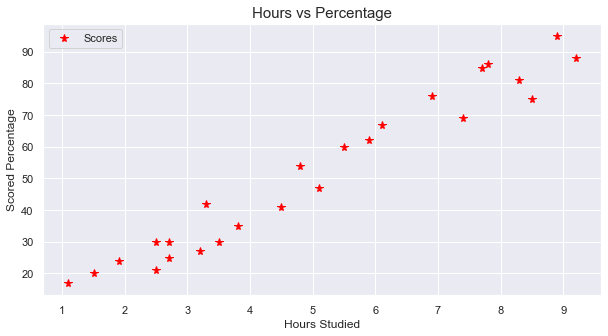

In [6]:
# Plotting the distribution of scores

plt.rcParams["figure.figsize"] = (10,5) 
df.plot(x='Hours', y='Scores', style='*', color='red', markersize=8)
plt.title('Hours vs Percentage', fontsize=15)  
plt.xlabel('Hours Studied')  
plt.ylabel('Scored Percentage')  
plt.show()

From the graph above, we can observe a **Positive Linear Relationship** between the two variables 'Hours Studied' & 'Scored Percentage' 

## Divide the Data

In this step, we will split the whole dataset into 2 parts - **Testing data and Training data**.

In [7]:
# using iloc function we will divide the data 

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values
print('Data has been divided successfully')

Data has been divided successfully


## Split the Data into Training & Testing Datasets 

In [8]:
# Splitting data into training and testing data

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Here the data is now splitted into Training & Testing Datasets in **80–20** ratio.

## Creating the Training Model

We have splited our data into training and testing sets, and now we will train our Model.

In [9]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Visualizing the Model

After training the model, now its time to visualize it.

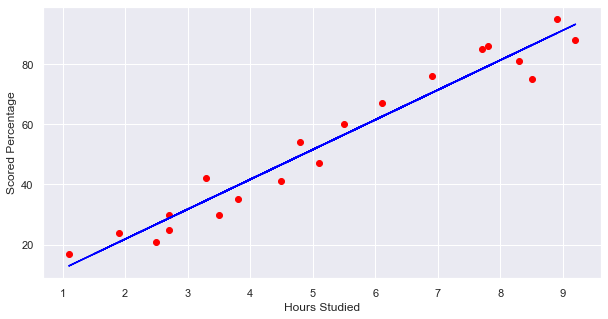

In [10]:
# Plotting the regression line
line = model.coef_*X+model.intercept_

# Plotting for the training data
plt.scatter(X_train, y_train, color='red')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Scored Percentage') 
plt.show()

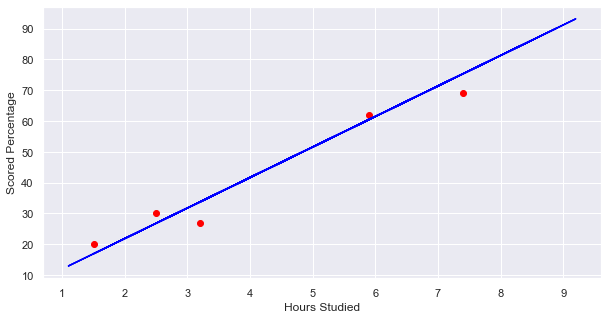

In [11]:
# Plotting for the testing data

plt.scatter(X_test, y_test, color='red')
plt.plot(X, line, color='blue')
plt.xlabel('Hours Studied')  
plt.ylabel('Scored Percentage') 
plt.show()


## Making the Predictions

Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
# Predicting the scores
y_pred = model.predict(X_test) 

## Compare Actual Vs Predicted 

In [13]:
# Comparing Actual vs Predicted
DF = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': y_pred})  
DF 

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


###  Problem Statement : What will be predicted score if a student studies for 9.25 hrs/ day?

In [14]:
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score of a student if he studies for",hours,"hours is",own_pred[0])

The predicted score of a student if he studies for 9.25 hours is 93.69173248737538


#### Hence, it can be concluded that the predicted score of a student if he studies for 9.25 hours is 93.69173249

## Evaluate the Performance of the Algorithm

In the last step, we are going to evaluate our trained model. 

In [15]:
from sklearn import metrics  

In [16]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))


In [17]:
print('Mean Squared Error is : ' , mse)
print('Root Mean Squared Error is : ' , rmse)
print('Mean Absolute Error is : ' , mae)

Mean Squared Error is :  21.598769307217413
Root Mean Squared Error is :  4.647447612100368
Mean Absolute Error is :  4.18385989900298



### Thank you !